# includes

In [3]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick
SYMBOL_ENM = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [ ]:
print(mpf.__version__)

# simple flow

## Configure data input

### Presets
````
SYMBOLS = ['BTCUSDT', 'ETHUSDT']
INTERVALS = ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']
TOTAL_CANDLES = 100
SYMBOL = 'BTCUSDT'
DEF_INTERVAL = '1m'
DATA_REFRESH_RAT = 3


In [4]:
#initialize data processor
TOTAL_CANDLES = 100

dp = DataProc('.\\.data\\ntb\\v0.0501a\\')

print(dp)

NameError: name 'SYMBOLS' is not defined

In [ ]:

#datamap initialized with two entries: BTCUSDT and ETHUSDT, each may hold candles data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])

#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date}-{end_date} \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')

WHT?

In [8]:


pair_df,_,_ = dp.get_new_data('AVAXUSDT', '1h')

print(pair_df)

KeyError: 'AVAXUSDT'

## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

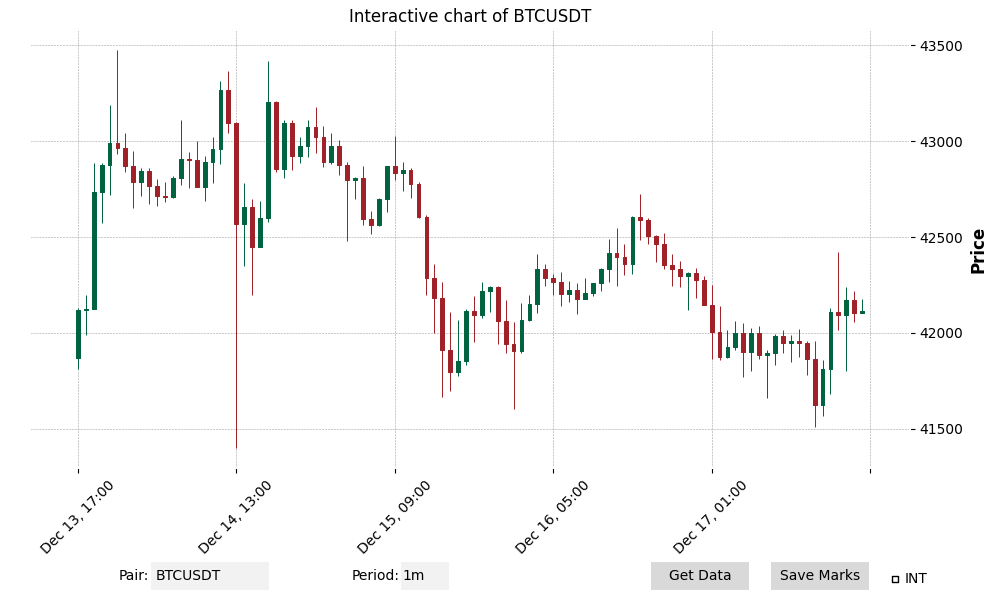

In [5]:
# plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)
plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [ ]:
# Save points to file
# plotter.save_m_to_file()

print(f'Default pair: {plotter.pair} default period: {plotter.interval}')
   

## debug print from chart, on mouse click 

In [ ]:
print(plotter.captured_output)

In [ ]:
#del plotter

In [ ]:
df = datamap
df = df.loc[:, df.notna().any()]
print(df)